# DIY NN XOR DEMO

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from IPython.display import display                               
from ipywidgets import interactive

In [25]:
NUM_HIDDEN = 2

input = np.ones(3)   # x1, x2, bias
hidden = np.ones(NUM_HIDDEN+1)  # h1, h2, bias
output = np.zeros(1) # o1

w1 = np.zeros_like(input) # input to hidden
w2 = np.zeros_like(hidden) # hidden to output

In [26]:
# very simple actiivation function
def act(x):
    if x>=0: return 1
    else: return -1

In [27]:
def act(x):
    return np.tanh(x)

In [28]:
def forward():
    """propogates input to output"""
    net1 = np.dot(input,w1)
    hidden[0] = act(net1)
    
    net2 = np.dot(hidden,w2)
    #output[0] = act(net2)
    output[0] = net2    

In [29]:
def plot_decision(X, cmap='bwr', h=0.1, margin=0.5):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xrange = np.arange(x_min, x_max, h)
    yrange = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xrange,yrange )
    Z = np.zeros_like(xx)
    
    for i in range(len(xrange)):
        input[0] = xrange[i]
        for j in range(len(yrange)):
            input[1] = yrange[j]
            forward()
            Z[i,j] = output[0]
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #print(Z)
    plt.pcolormesh(xx, yy, Z, cmap=cmap,vmin=-2, vmax=2)

[0.14985202 0.44139542 0.37751567]
[0.39865214 0.07783722 0.18185591]


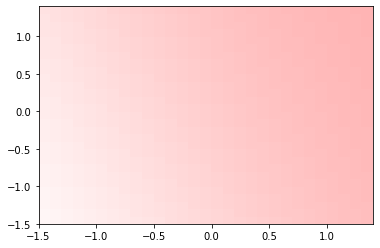

In [30]:
w1 = np.random.rand(w1.size)
w2 = np.random.rand(w2.size)

X = np.array([[-1,-1],[1,1]])

plot_decision(X,h = 0.1)
print(w1)
print(w2)
#print(input)
#print(hidden)
#print(output)

In [31]:
def nn_widget(w_in1,w_in2,w_inb,w_out=1,w_outb=0):
    w1[0] = w_in1
    w1[1] = w_in2
    w1[2] = w_inb
    w2[0] = w_out
    w2[1] = w_outb
    plot_decision(X,h = 0.1,cmap='bwr')

In [32]:
#w1 = np.random.rand(w1.size)
#w2 = np.random.rand(w2.size)
NUM_HIDDEN = 1

input = np.ones(3)   # x1, x2, bias
hidden = np.ones(NUM_HIDDEN+1)  # h1, bias
output = np.zeros(1) # o1

w1 = np.zeros_like(input) # input to hidden
w2 = np.zeros_like(hidden) # input to hidden

X = np.array([[-1,-1],[1,1]])

inter=interactive(nn_widget, w_in1=(-1,1,0.1), w_in2=(-1,1,0.1), w_inb=(-1,1,0.1),
                  w_out=(-1,1,0.1), w_outb=(-1,1,0.1))

display(inter)

interactive(children=(FloatSlider(value=0.0, description='w_in1', max=1.0, min=-1.0), FloatSlider(value=0.0, d…

----
# 2 Hidden Nodes

In [33]:
NUM_INPUT = 2+1 # INCLUDES BIAS
NUM_HIDDEN = 2+1  # INCLUDES BIAS

input = np.ones(NUM_INPUT)   # x1, x2, bias
hidden = np.ones(NUM_HIDDEN)  # h1, h2, bias
output = np.zeros(1) # o1

w1 = np.zeros((NUM_HIDDEN-1, NUM_INPUT)) # input to hidden
w2 = np.zeros(NUM_HIDDEN) # hidden to output


In [34]:
def forward2():
    """propogates input to output"""
    for i in range(NUM_HIDDEN-1):   # exclude bias node
        net = np.dot(input,w1[i])
        hidden[i] = act(net)

    net2 = np.dot(hidden,w2)
    #output[0] = act(net2)
    output[0] = net2    

In [35]:
def plot_decision2(X, cmap='bwr', h=0.1, margin=0.5):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xrange = np.arange(x_min, x_max, h)
    yrange = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xrange,yrange )
    Z = np.zeros_like(xx)
    
    for i in range(len(xrange)):
        input[0] = xrange[i]
        for j in range(len(yrange)):
            input[1] = yrange[j]
            forward2()
            Z[i,j] = output[0]
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #print(Z)
    plt.pcolormesh(xx, yy, Z, cmap=cmap,vmin=-2, vmax=2)

In [36]:
def nn_widget(h10,h11,h12,h20,h21,h22,o0,o1,o2):
    w1[0,0] = h10
    w1[0,1] = h11
    w1[0,2] = h12
    w1[1,0] = h20
    w1[1,1] = h21
    w1[1,2] = h22
    w2[0] = o0
    w2[1] = o1
    w2[2] = o2
    
    plot_decision2(X,h = 0.1,cmap='bwr')

In [37]:

X = np.array([[-1,-1],[1,1]])

inter=interactive(nn_widget, h10=(-1,1,0.1), h11=(-1,1,0.1), h12=(-1,1,0.1),
                  h20=(-1,1,0.1), h21=(-1,1,0.1), h22=(-1,1,0.1),
                  o0=(-1,1,0.1), o1=(-1,1,0.1), o2=(-1,1,0.1))

display(inter)

interactive(children=(FloatSlider(value=0.0, description='h10', max=1.0, min=-1.0), FloatSlider(value=0.0, des…

In [20]:
w1

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
w2


array([0., 0., 0.])